In [1]:
# 导入数据分析包
import pandas as pd
import numpy as np
# 导入数据可视化包
import matplotlib.pyplot as plt
import seaborn as sns
# 导入数据编码包
from sklearn.preprocessing import LabelEncoder

In [2]:
# 任务一

In [3]:
# 数据加载
data=pd.read_csv('../data/churn.csv')

In [4]:
# 任务二：数据探索分析

In [5]:
# 显示数据
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [6]:
# 查看数据情况
data.info()  # 数据情况很好，无缺失值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           3333 non-null   object 
 1   Account Length  3333 non-null   int64  
 2   Area Code       3333 non-null   int64  
 3   Phone           3333 non-null   object 
 4   Int'l Plan      3333 non-null   object 
 5   VMail Plan      3333 non-null   object 
 6   VMail Message   3333 non-null   int64  
 7   Day Mins        3333 non-null   float64
 8   Day Calls       3333 non-null   int64  
 9   Day Charge      3333 non-null   float64
 10  Eve Mins        3333 non-null   float64
 11  Eve Calls       3333 non-null   int64  
 12  Eve Charge      3333 non-null   float64
 13  Night Mins      3333 non-null   float64
 14  Night Calls     3333 non-null   int64  
 15  Night Charge    3333 non-null   float64
 16  Intl Mins       3333 non-null   float64
 17  Intl Calls      3333 non-null   i

+ 'State'：州名
+ 'Account Length'：账户长度
+ 'Area Code'：区号
+ 'Phone'：电话号码
+ "Int'l Plan"：国际计划
+ 'VMail Plan'：语音邮箱
+ 'VMail Message'：语言消息
+ 'Day Mins'：白天通话分钟数
+ 'Day Calls'：白天电话个数
+ 'Day Charge'：白天通话收费
+ 'Eve Mins'：晚间通话分钟数
+ 'Eve Calls'：晚间电话个数
+ 'Eve Charge'：晚间通话收费 
+ 'Night Mins'：夜间通话分钟数
+ 'Night Calls'：夜间电话个数<br/*
+ 'Night Charge'：夜间通话收费 
+ 'Intl Mins'：国际分钟数
+ 'Intl Calls'：国际电话个数
+ 'Intl Charge'：国际通话收费 
+ 'CustServ Calls'：客服电话数
+ 'Churn?'：流失与否

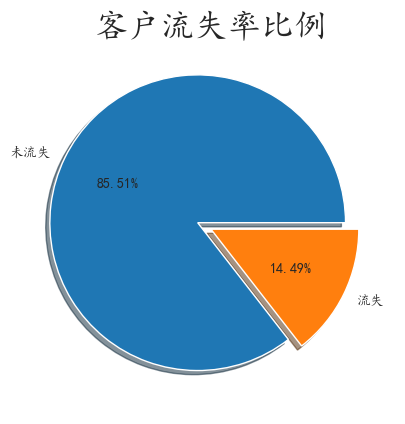

In [9]:
#解决中文显示问题
plt.rcParams['font.sans-serif'] = ['KaiTi'] # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
# 查看总体客户流失情况
churnvalue = data["Churn?"].value_counts()
labels = data["Churn?"].value_counts().index
plt.pie(churnvalue,
        labels=["未流失","流失"],
        explode=(0.1,0),
        autopct='%.2f%%', 
        shadow=True,)
plt.title("客户流失率比例",size=24)
plt.show()

In [10]:
# 任务三：数据预处理和特征工程

In [16]:
# #查看数据同化值，如有就删除
# 写法1：
for c in data: 
    if data[c].nunique()==1:
        print(c,data[c].nunique())
        data=data.drop(c,axis=1)

# 写法2：
# data=data.loc[:,data.nunique()>1]

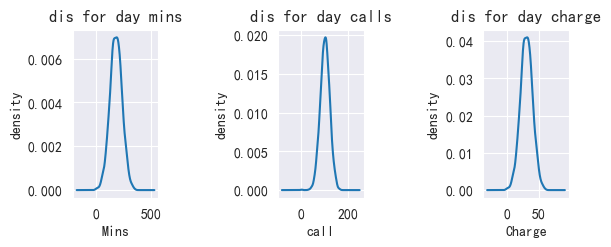

In [21]:
plt.subplot2grid(( 2, 5),( 0, 0)) 
data[ 'Day Mins'].plot(kind= 'kde') 
plt.xlabel( u"Mins") 
plt.ylabel( u"density") 
plt.title( u"dis for day mins")

plt.subplot2grid(( 2, 5),( 0, 2))
data[ 'Day Calls'].plot(kind= 'kde') 
plt.xlabel( u"call") 
plt.ylabel( u"density") 
plt.title( u"dis for day calls")

plt.subplot2grid(( 2, 5),( 0, 4)) 
data[ 'Day Charge'].plot(kind= 'kde') 
plt.xlabel( u"Charge")
plt.ylabel( u"density") 
plt.title( u"dis for day charge")
plt.show()

Text(0.5, 1.0, "Churn by Int'l Plan")

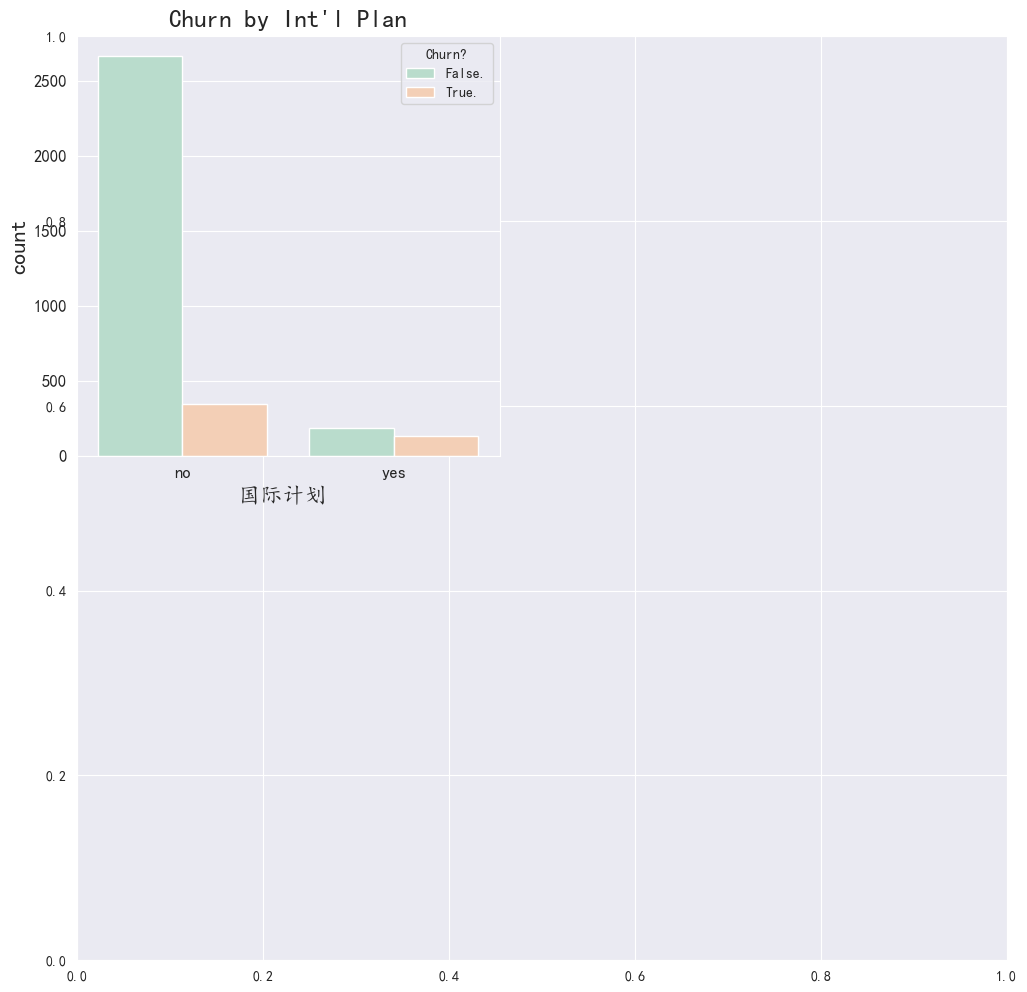

In [22]:
fig, axes = plt.subplots(1, 1, figsize=(12,12))
plt.subplot(2,2,1) 
# palette参数表示设置颜色
gender=sns.countplot(x="Int'l Plan",hue="Churn?",data=data,palette="Pastel2") 
plt.xlabel("国际计划 ",fontsize=16)
plt.ylabel('count',fontsize=16)
plt.tick_params(labelsize=12)     # 设置坐标轴字体大小
plt.title("Churn by Int'l Plan",fontsize=18)

Text(0.5, 1.0, 'Churn by CustServ Calls')

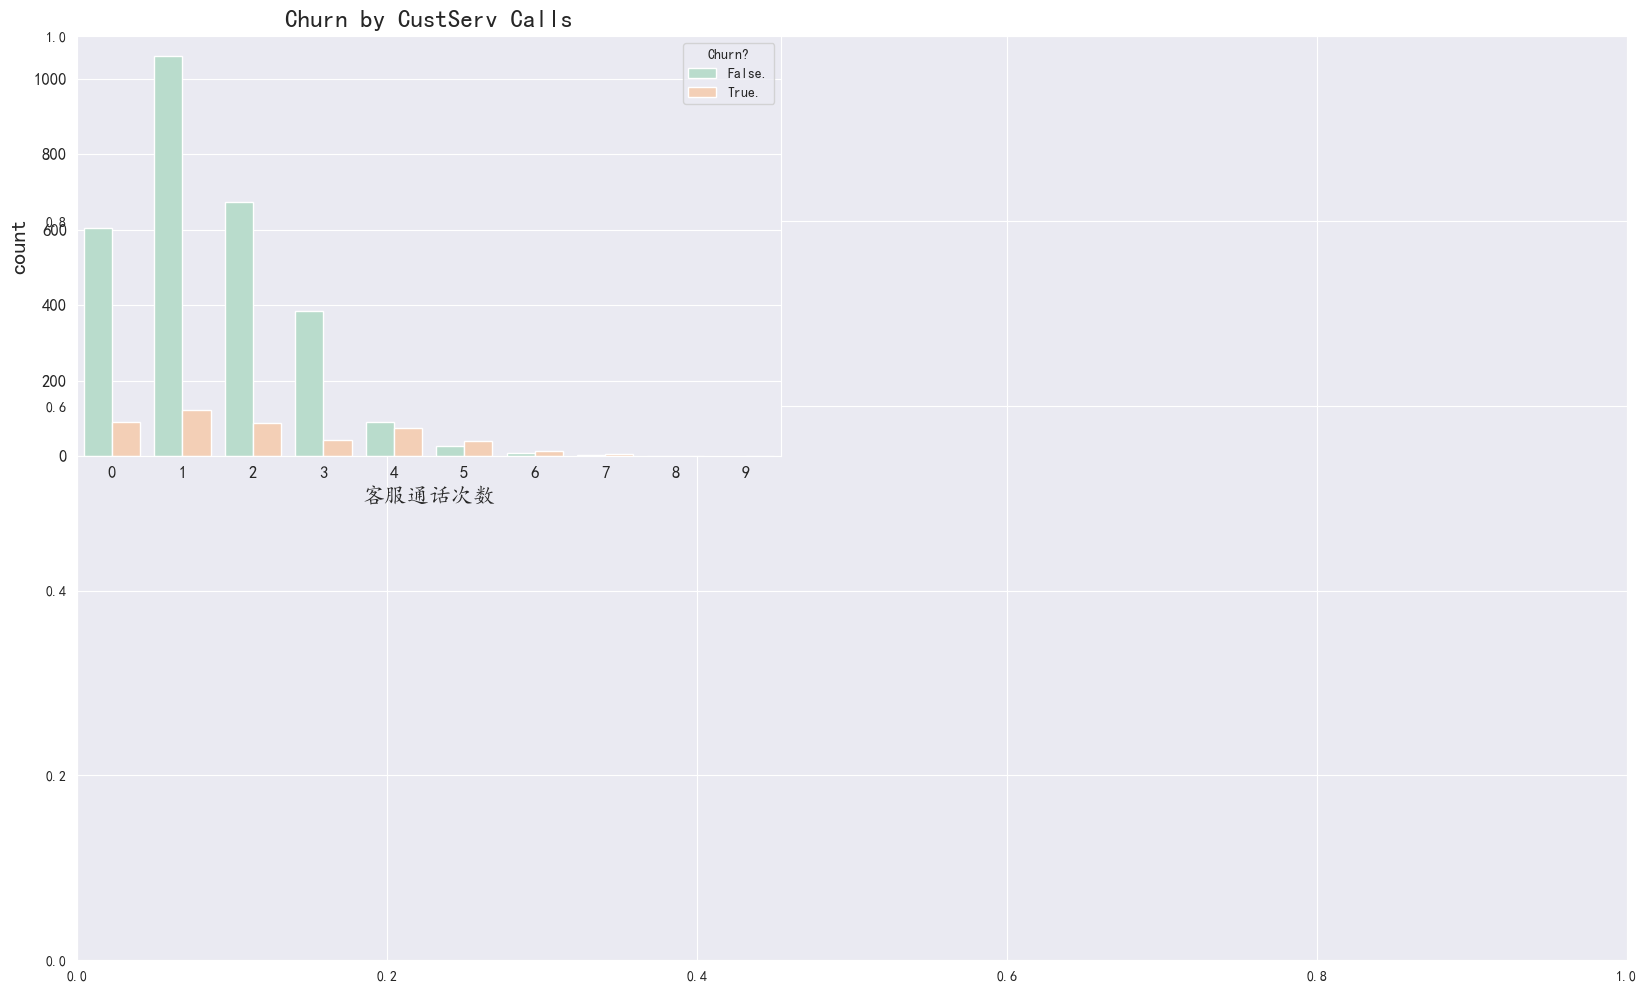

In [23]:
fig, axes = plt.subplots(1, 1, figsize=(20,12))
plt.subplot(2,2,1) 
# palette参数表示设置颜色
gender=sns.countplot(x="CustServ Calls",hue="Churn?",data=data,palette="Pastel2") 
plt.xlabel("客服通话次数",fontsize=16)
plt.ylabel('count',fontsize=16)
plt.tick_params(labelsize=12)     # 设置坐标轴字体大小
plt.title("Churn by CustServ Calls",fontsize=18)

In [27]:
# 对字符型变量进行LabelEncoder编码
'''
这段代码通过 LabelEncoder 将数据集中的字符型列转换为数值型列，适用于处理分类变量。但需要注意 Label Encoding 的局限性，并根据实际需求选择合适的编码方式（如 One-Hot Encoding）。
'''
labelencoder=LabelEncoder()
for i in data:
    if data[i].dtypes == 'object':
        data[i] = labelencoder.fit_transform(data[i])

In [28]:
#拆分自变量和因变量
X=data.drop('Churn?',axis=1)
y=data[['Churn?']]

<Axes: >

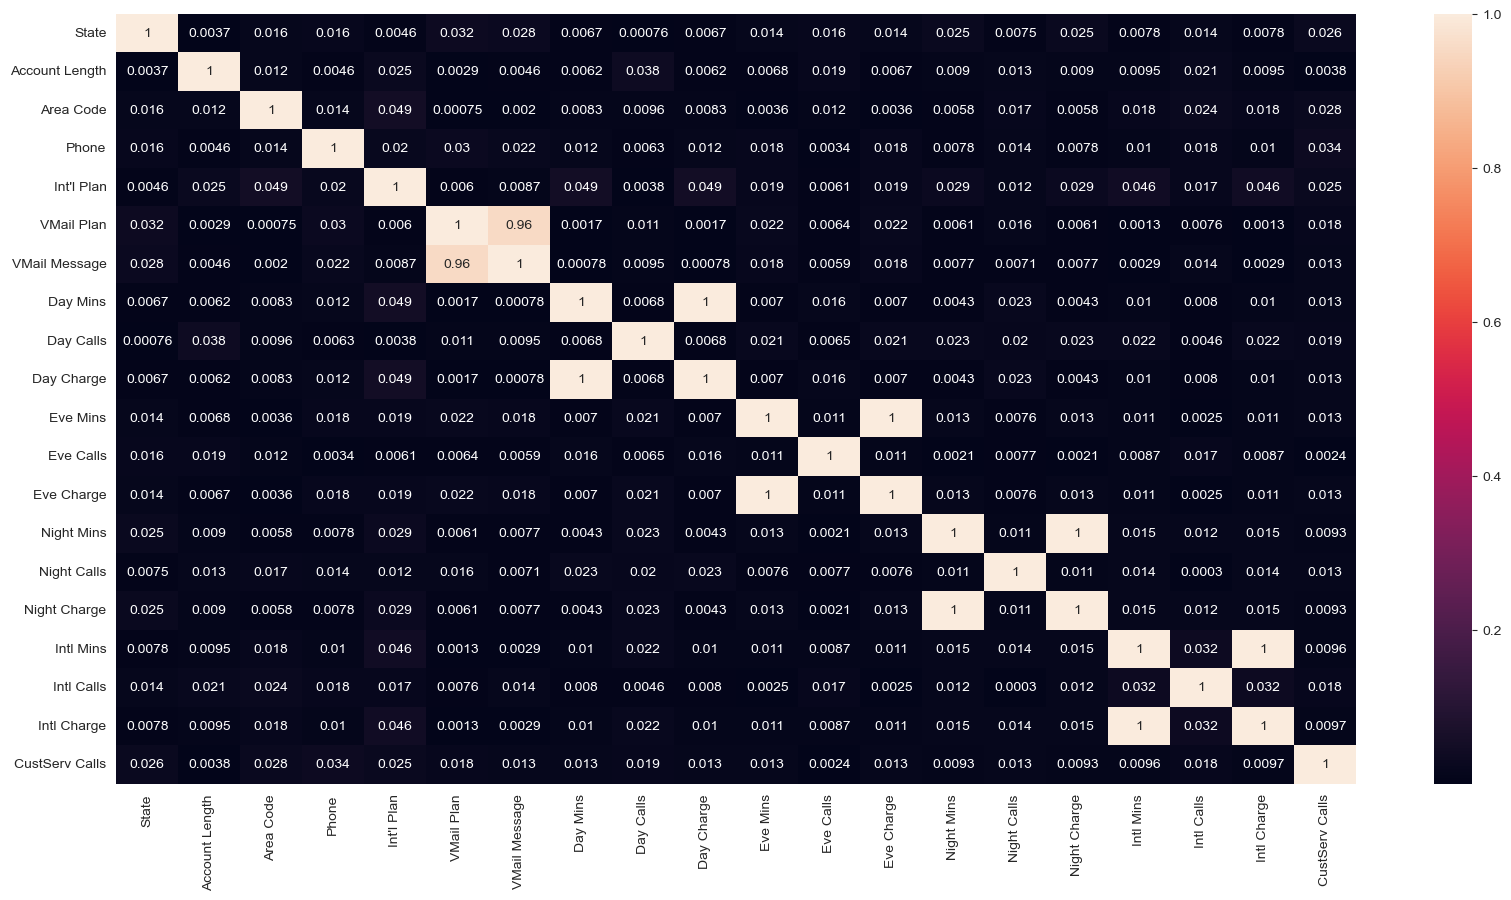

In [33]:
# 自变量相关性可视化
X_corr = X.corr().abs()
plt.subplots(figsize=(20,10))
sns.heatmap(X_corr,annot=True)

In [34]:
# 删除相关性>0.7的变量
x=X.drop(['VMail Message','Day Charge','Eve Charge','Night Charge','Intl Charge'],axis=1)

In [35]:
# 任务四：模型训练

In [36]:
from sklearn.model_selection import train_test_split  #用于拆分数据集
from sklearn.linear_model import LogisticRegression  #导入逻辑回归
import warnings
warnings.filterwarnings("ignore")#忽略警告
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.4,random_state=100)  #把数据集拆分为训练测、测试集
lr=LogisticRegression()  #实例化逻辑回归
lr.fit(x_train,y_train)  #训练模型

LogisticRegression()

In [37]:
# 任务五：模型评估

In [38]:
from sklearn.metrics import accuracy_score
y_train_pred=lr.predict(x_train)  #训练数据预测值
y_test_pred=lr.predict(x_test)  #测试数据预测值
print ('train accuracy_score: %0.3f' % accuracy_score(y_train, y_train_pred))  #打印训练集精确率
print ('test accuracy_score: %0.3f' % accuracy_score(y_test, y_test_pred))  #打印测试集精确率


train accuracy_score: 0.850
test accuracy_score: 0.862


In [39]:
# 评分报告（precision：准确率 recall：召回率）
from sklearn.metrics import classification_report
print(classification_report(y_train,y_train_pred))
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1697
           1       0.55      0.06      0.11       302

    accuracy                           0.85      1999
   macro avg       0.70      0.53      0.51      1999
weighted avg       0.81      0.85      0.80      1999

              precision    recall  f1-score   support

           0       0.87      0.99      0.93      1153
           1       0.43      0.05      0.09       181

    accuracy                           0.86      1334
   macro avg       0.65      0.52      0.51      1334
weighted avg       0.81      0.86      0.81      1334


Text(0.5, 1.0, 'Test ROC Curve')

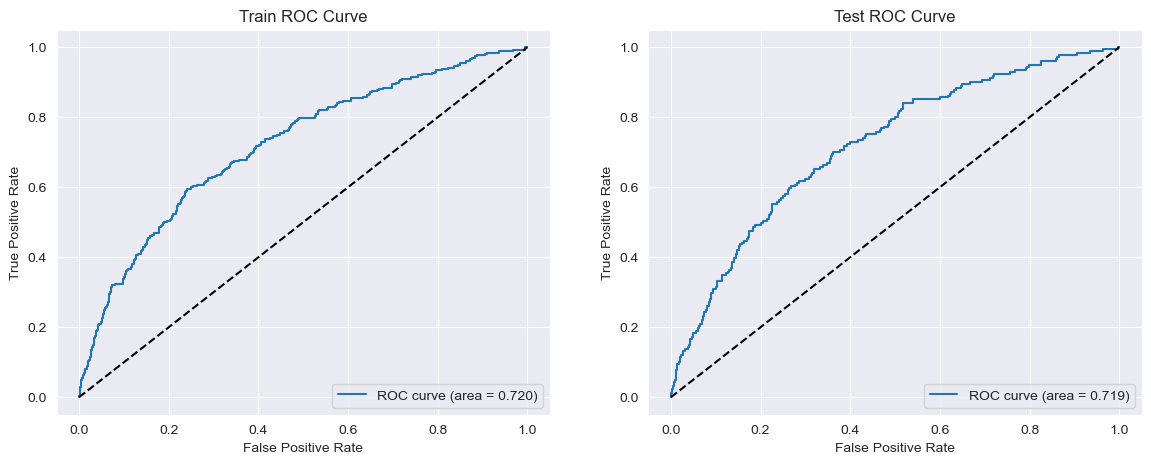

In [41]:
#Roc_Auc曲线 
from sklearn.metrics import roc_curve,auc
y_train_prob=lr.predict_proba(x_train)[:,1]  #训练数据预测为客户流失的概率
y_test_prob=lr.predict_proba(x_test)[:,1]  #测试数据预测为客户流失的概率
fpr1, tpr1, _ = roc_curve(y_test, y_test_prob)
fpr2, tpr2, _ = roc_curve(y_train, y_train_prob)
roc_auc1 = auc(fpr1, tpr1)
roc_auc2 = auc(fpr2, tpr2)
 
fig=plt.figure(figsize=(14,5))
ax1 = fig.add_subplot(1,2,1)
plt.plot(fpr2, tpr2, label='ROC curve (area = %0.3f)' % roc_auc2)
plt.plot([0, 1], [0, 1], 'k--')
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Train ROC Curve')
ax2 = fig.add_subplot(1,2,2)
plt.plot(fpr1, tpr1, label='ROC curve (area = %0.3f)' % roc_auc1)
plt.plot([0, 1], [0, 1], 'k--')
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test ROC Curve')